In [1]:
import numpy as np
import pandas as pd
import h5py



import pybel
from tfbio.data import Featurizer

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# path to the extracted PDBbind dataset
path = '../../../scratch/kanakala.ganesh/2019/'

# Parse and clean affinity data

In [3]:
path1 = '../../../scratch/kanakala.ganesh/2019/v2019-other-PL/'
path2 = '../../../scratch/kanakala.ganesh/2019/refined-set/'

In [13]:
f = open('../../../scratch/kanakala.ganesh/2019/refined-set/index/INDEX_general_PL_data.2019')
lines = f.readlines()


In [36]:
f2 = open('affinity_data_custom.csv', 'a')
f2.write('pdbid -logKd/Ki' + '\n')
for i in range(len(lines)):
    l = lines[i].split()
    if (l[0] != "#"):
        f2.write(l[0] + ' '+ l[3] + '\n')
    else:
        print(lines[i])
f2.close()

# ==============================================================================

# List of protein-ligand complexes with known binding data in PDBbind v.2019

# 17679 protein-ligand complexes in total, sorted by binding data

# Latest update: Dec 2019

# PDB code, resolution, release year, -logKd/Ki, Kd/Ki, reference, ligand name

# ==============================================================================



In [4]:
import os

In [5]:
general_list = os.listdir(path1)
refined_list = os.listdir(path2)

In [6]:
len(general_list)

12802

In [40]:
f3 = open('affinity_data_custom_clean.csv', 'a')
f3.write('pdbid -logKd/Ki class' + '\n')
c=0
for i in range(len(lines)):
    l = lines[i].split()
    if (l[0] != "#"):
        id = l[0]
        if id in general_list and id not in refined_list:
            f3.write(l[0] + ' '+ l[3] + ' ' +  'general'+'\n')
        elif id in refined_list and id not in general_list:
            f3.write(l[0] + ' '+ l[3] + ' ' + 'refined'+'\n')
        else:
            print(lines[i], "missing")
            print(c)
            c=c+1
    else:
        print(lines[i])
f3.close()

# ==============================================================================

# List of protein-ligand complexes with known binding data in PDBbind v.2019

# 17679 protein-ligand complexes in total, sorted by binding data

# Latest update: Dec 2019

# PDB code, resolution, release year, -logKd/Ki, Kd/Ki, reference, ligand name

# ==============================================================================

1d2v  1.75  2000   1.70  Kd=20mM       // 1d2v.pdf (BR)
 missing
0
1jou  1.80  2001   1.70  Kd=20mM       // 1jou.pdf (Na+)
 missing
1
1s8j  2.30  2004   1.77  Kd=17mM       // 1s8j.pdf (NO3)
 missing
2
1cam  1.70  1993   2.40  Kd=4mM        // 1cam.pdf (BCT)
 missing
3
5y79  2.20  2017   3.22  Ki=0.6mM      // 5y78.pdf (3PG)
 missing
4
2adj  2.90  2005   3.73  Kd=0.187mM    // 2adi.pdf (Ca2+)
 missing
5
1pts  2.00  1994   3.89  Kd=0.13mM     // 1pts.pdf (7-mer)
 missing
6
6eu6  1.98  2018   4.39  Kd=41uM       // 6eu6.pdf (NH4)
 missing
7
3b5y  4.50  2007   5.00  Ki=10uM      

In [7]:
path3= '../../../scratch/kanakala.ganesh/2019/coreset/'

In [8]:
core_list = os.listdir(path3)

In [9]:
len(core_list)

285

In [10]:
affinity_data = pd.read_csv('affinity_data_custom_clean.csv', delimiter=' ')
# affinity_data = affinity_data[~np.in1d(affinity_data['pdbid'], list(missing))]
affinity_data.head()

,pdbid,-logKd/Ki,class
0,3zzf,0.40,general
1,3gww,0.45,general
2,1w8l,0.49,general
3,3fqa,0.49,general
4,1zsb,0.60,general


In [11]:
# Check for NaNs

affinity_data['-logKd/Ki'].isnull().any()

False

In [12]:
len(general_list)

12802

In [13]:
len(general_list), len(refined_list), len(core_list)

(12802, 4854, 285)

In [14]:
for i in core_list:
    if i in general_list:
        print(i ,"is in gen")
        general_list.remove(i)
    if i in refined_list:
        print(i, "is in ref")
        refined_list.remove(i)
    

4eor is in ref
4u4s is in gen
3b65 is in ref
4jfs is in ref
3gy4 is in ref
3b68 is in ref
3n86 is in ref
3f3d is in ref
4ivc is in ref
2v7a is in ref
1u1b is in ref
2brb is in ref
1y6r is in ref
4djv is in ref
3fv1 is in ref
3arp is in ref
4e6q is in ref
3uex is in ref
4j21 is in ref
2zb1 is in ref
1p1n is in ref
3arq is in ref
1ps3 is in ref
2wer is in ref
2r9w is in ref
2fvd is in ref
2p4y is in ref
3dx1 is in ref
1c5z is in gen
1q8u is in ref
2wnc is in ref
4cig is in ref
4jia is in ref
3fv2 is in ref
4rfm is in ref
3dd0 is in ref
3qqs is in ref
1nvq is in ref
3ui7 is in ref
4ivd is in ref
2xj7 is in ref
3uo4 is in ref
4agq is in ref
1gpn is in ref
3uev is in ref
4tmn is in ref
2vvn is in ref
1h22 is in ref
3o9i is in ref
3l7b is in gen
4k18 is in ref
3ary is in gen
3gnw is in ref
4f3c is in ref
4gkm is in ref
4jsz is in ref
1eby is in ref
4mme is in ref
2qnq is in ref
2qe4 is in ref
3gc5 is in ref
3qgy is in ref
4cra is in ref
4w9h is in ref
3nx7 is in ref
2wbg is in ref
1s38 is in

In [15]:
len(general_list), len(refined_list), len(core_list)

(12783, 4588, 285)

In [16]:
for i in general_list:
    if i in refined_list:
        print(i)

readme
index


In [17]:
# # Separate core, refined, and general sets

# core_set = ! grep -v '#' $path/PDBbind_2016_plain_text_index/index/INDEX_core_data.2016 | cut -f 1 -d ' '
# core_set = set(core_set)

# refined_set = ! grep -v '#' $path/PDBbind_2016_plain_text_index/index/INDEX_refined_data.2016 | cut -f 1 -d ' '
# refined_set = set(refined_set)

# general_set = set(affinity_data['pdbid'])


# assert core_set & refined_set == core_set
# assert refined_set & general_set == refined_set

# len(general_set), len(refined_set), len(core_set)

In [17]:
affinity_data['include'] = True

In [18]:
# # Exclude v 2013 core set - it will be used as another test set

# core2013 = ! cat core_pdbbind2013.ids
# core2013 = set(core2013)

# affinity_data['include'] = True
# affinity_data.loc[np.in1d(affinity_data['pdbid'], list(core2013 & (general_set - core_set))), 'include'] = False

In [19]:
affinity_data['set'] = affinity_data['class']

In [20]:
affinity_data = affinity_data.drop(columns=['class'])

In [21]:
affinity_data.loc[np.in1d(affinity_data['pdbid'], list(general_list)), 'set'] = 'general'

affinity_data.loc[np.in1d(affinity_data['pdbid'], list(refined_list)), 'set'] = 'refined'

affinity_data.loc[np.in1d(affinity_data['pdbid'], list(core_list)), 'set'] = 'core'

affinity_data.head()

,pdbid,-logKd/Ki,include,set
0,3zzf,0.40,True,general
1,3gww,0.45,True,general
2,1w8l,0.49,True,general
3,3fqa,0.49,True,general
4,1zsb,0.60,True,general


In [22]:
affinity_data[affinity_data['include']].groupby('set').apply(len).loc[['general', 'refined', 'core']]

set
general    12781
refined     4586
core         285
dtype: int64

/home2/kanakala.ganesh/miniconda3/envs/pafnucy_env/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home2/kanakala.ganesh/miniconda3/envs/pafnucy_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home2/kanakala.ganesh/miniconda3/envs/pafnucy_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Future

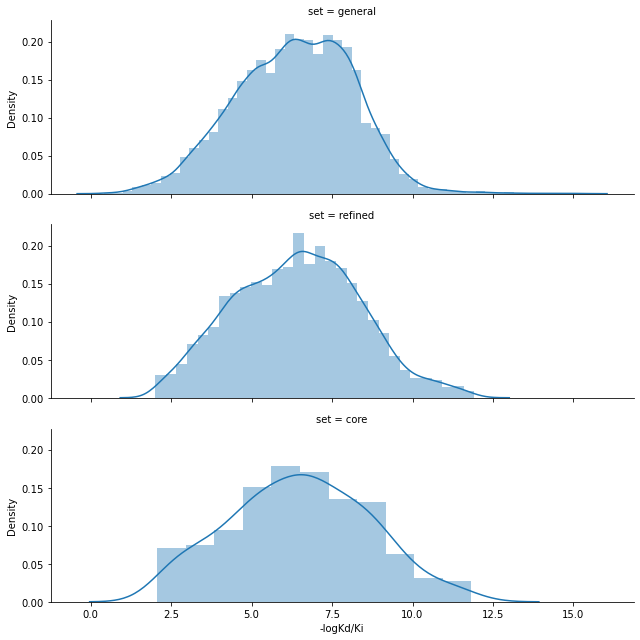

In [23]:
# Check affinity distributions

grid = sns.FacetGrid(affinity_data[affinity_data['include']], row='set', row_order=['general', 'refined', 'core'],
                     size=3, aspect=3)
grid.map(sns.distplot, '-logKd/Ki');

In [24]:
affinity_data[['pdbid']].to_csv('pdb_custom.ids', header=False, index=False)

In [25]:
affinity_data[['pdbid', '-logKd/Ki', 'set']].to_csv('affinity_data_cleaned_custom.csv', index=False)

# Parse molecules

In [26]:
dataset_path = {'general': 'general-set-except-refined', 'refined': 'refined-set', 'core': 'refined-set'}

In [27]:
path = '/'

In [28]:
%%bash 

# Prepare pockets with UCSF Chimera - pybel sometimes fails to calculate the charges.
# Even if Chimera fails to calculate several charges (mostly for non-standard residues),
# it returns charges for other residues.

# echo bruh
for pdbfile in /scratch/kanakala.ganesh/2019/coreset/*/*_pocket.pdb; do
    mol2file=${pdbfile%pdb}mol2
#     echo $mol2file
#     if [[ ! -f $mol2file ]]; then
        echo $mol2file
        echo -e "open $pdbfile \n addh \n addcharge \n write format mol2 0 tmp.mol2 \n stop" | chimera --nogui
        # Do not use TIP3P atom types, pybel cannot read them
        sed 's/H\.t3p/H    /' tmp.mol2 | sed 's/O\.t3p/O\.3  /' > $mol2file
#     fi
done 


bruh
/scratch/kanakala.ganesh/2019/coreset/1a30/1a30_pocket.mol2
> Opening 1a30_pocket.pdb...
The following problems occurred while reading PDB file for 1a30_pocket.pdb

Model 0 (1a30_pocket.pdb) appears to be a protein without secondary structure assignments.
Automatically computing assignments using 'ksdssp' and parameter values:
  energy cutoff -0.5
  minimum helix length 3
  minimum strand length 3
Use command 'help ksdssp' for more information.

Computing secondary structure assignments...
Computed secondary structure assignments (see reply log)
1a30_pocket.pdb opened
> No SEQRES records for 1a30_pocket.pdb (#0) principal chain;
 guessing terminii instead

Chain-initial residues that are actual N terminii: 

Chain-initial residues that are not actual N terminii: :23

Chain-final residues that are actual C terminii: 

Chain-final residues that are not actual C terminii: :85

Categorizing heavy atoms
Building search tree of atom positions
Adding simple fixed hydrogens
Adding co-plan

Correct charges are unknown for 3 non-standard atom names in otherwise standard residues

Charges of 0.0 were assigned to the unknown atoms

1 model(s) had non-integral total charge
Details in reply log

Correct charges are unknown for 3 non-standard atom names in otherwise standard residues

Charges of 0.0 were assigned to the unknown atoms

1 model(s) had non-integral total charge
Details in reply log

Correct charges are unknown for 3 non-standard atom names in otherwise standard residues

Charges of 0.0 were assigned to the unknown atoms

1 model(s) had non-integral total charge
Details in reply log

Correct charges are unknown for 3 non-standard atom names in otherwise standard residues

Charges of 0.0 were assigned to the unknown atoms

1 model(s) had non-integral total charge
Details in reply log

Correct charges are unknown for 3 non-standard atom names in otherwise standard residues

Charges of 0.0 were assigned to the unknown atoms

1 model(s) had non-integral total charge
De

In [42]:
# %%bash -s $path

# # Prepare pockets with UCSF Chimera - pybel sometimes fails to calculate the charges.
# # Even if Chimera fails to calculate several charges (mostly for non-standard residues),
# # it returns charges for other residues.

# path=$1

# for dataset in general-set-except-refined refined-set; do
#     echo $dataset
#     for pdbfile in /scratch/kanakala.ganesh/2019/coreset/*/*_pocket.pdb; do
#         mol2file=${pdbfile%pdb}mol2
#         if [[ ! -e $mol2file ]]; then
#             echo -e "open $pdbfile \n addh \n addcharge \n write format mol2 0 tmp.mol2 \n stop" | chimera --nogui
#             # Do not use TIP3P atom types, pybel cannot read them
#             sed 's/H\.t3p/H    /' tmp.mol2 | sed 's/O\.t3p/O\.3  /' > $mol2file
#         fi
#     done 
# done > chimera_rw.log

In [31]:
# import MDAnalysis as mda

In [28]:
# mda.Universe('/scratch/kanakala.ganesh/2019/CASF-2016/coreset/1a30/1a30_pocket.pdb').atoms.write('/scratch/kanakala.ganesh/2019/CASF-2016/coreset/1a30/1a30_pocket.mol2')

In [1]:
# data

In [29]:
featurizer = Featurizer()
charge_idx = featurizer.FEATURE_NAMES.index('partialcharge')

path = '../../../scratch/kanakala.ganesh/2019'
ds_path = 'coreset'
# ds_path ="refined-set"
# ds_path= "v2019-other-PL"
data = affinity_data[affinity_data['set']=='core']    
dataset_name='core'
i=0
pocket_failed=[]
ligand_failed=[]
with h5py.File('%s/%s.hdf' % (path, dataset_name), 'w') as f:
    for _, row in data.iterrows():
        
        if row['pdbid'] in core_list:
            
            name = row['pdbid']
            affinity = row['-logKd/Ki']
            include = row['include']
            ligand = next(pybel.readfile('mol2', '%s/%s/%s/%s_ligand.mol2' % (path, ds_path, name, name)))
            # do not add the hydrogens! they are in the strucutre and it would reset the charges

            try:
                pocket = next(pybel.readfile('mol2', '%s/%s/%s/%s_pocket.mol2' % (path, ds_path, name, name)))
                # do not add the hydrogens! they were already added in chimera and it would reset the charges
            except:
                warnings.warn('no pocket for %s (%s set)' % (name, dataset_name))
                continue

            ligand_coords, ligand_features = featurizer.get_features(ligand, molcode=1)
            if not (ligand_features[:, charge_idx] != 0).any():
                ligand_failed.append(i)

            pocket_coords, pocket_features = featurizer.get_features(pocket, molcode=-1)
            if not (pocket_features[:, charge_idx] != 0).any():
                pocket_failed.append(i)

            centroid = ligand_coords.mean(axis=0)
            ligand_coords -= centroid
            pocket_coords -= centroid

            data = np.concatenate((np.concatenate((ligand_coords, pocket_coords)),
                                   np.concatenate((ligand_features, pocket_features))), axis=1)
    #         print(include)

            if row['include']:
                dataset = f.create_dataset(name, data=data, shape=data.shape, dtype='float32', compression='lzf')
                dataset.attrs['affinity'] = affinity
                i += 1
                print(i)
#             break
print('prepared', i, 'complexes')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [40]:
f.close()

In [43]:
len(ligand_failed), len(pocket_failed)

(0, 390)

In [1]:
# featurizer = Featurizer()
# charge_idx = featurizer.FEATURE_NAMES.index('partialcharge')

# with h5py.File('%s/core2013.hdf' % path, 'w') as g:
#     j = 0

#     for dataset_name, data in affinity_data.groupby('set'):

#         print(dataset_name, 'set')
#         i = 0
#         ds_path = dataset_path[dataset_name]


#         with h5py.File('%s/%s.hdf' % (path, dataset_name), 'w') as f:
#             for _, row in data.iterrows():

#                 name = row['pdbid']
#                 affinity = row['-logKd/Ki']

#                 ligand = next(pybel.readfile('mol2', '%s/%s/%s/%s_ligand.mol2' % (path, ds_path, name, name)))
#                 # do not add the hydrogens! they are in the strucutre and it would reset the charges

#                 try:
#                     pocket = next(pybel.readfile('mol2', '%s/%s/%s/%s_pocket.mol2' % (path, ds_path, name, name)))
#                     # do not add the hydrogens! they were already added in chimera and it would reset the charges
#                 except:
#                     warnings.warn('no pocket for %s (%s set)' % (name, dataset_name))
#                     continue

#                 ligand_coords, ligand_features = featurizer.get_features(ligand, molcode=1)
#                 assert (ligand_features[:, charge_idx] != 0).any()
#                 pocket_coords, pocket_features = featurizer.get_features(pocket, molcode=-1)
#                 assert (pocket_features[:, charge_idx] != 0).any() 

#                 centroid = ligand_coords.mean(axis=0)
#                 ligand_coords -= centroid
#                 pocket_coords -= centroid

#                 data = np.concatenate((np.concatenate((ligand_coords, pocket_coords)),
#                                        np.concatenate((ligand_features, pocket_features))), axis=1)

#                 if row['include']:
#                     dataset = f.create_dataset(name, data=data, shape=data.shape, dtype='float32', compression='lzf')
#                     dataset.attrs['affinity'] = affinity
#                     i += 1
#                 else:
#                     dataset = g.create_dataset(name, data=data, shape=data.shape, dtype='float32', compression='lzf')
#                     dataset.attrs['affinity'] = affinity
#                     j += 1

#         print('prepared', i, 'complexes')
#     print('excluded', j, 'complexes')

In [33]:
from sklearn.utils import shuffle


In [36]:
path = '/scratch/kanakala.ganesh/2019'
with h5py.File('%s/refined.hdf' % path, 'r') as f, \
     h5py.File('%s/lol_validation.hdf' % path, 'w') as g:
#     for name in f:
#         if name in core2013:
#             dataset = g.create_dataset(name, data=f[name])
#             dataset.attrs['affinity'] = f[name].attrs['affinity']
    
    shuffled = shuffle(list(f.keys()), random_state=123)
    for pdb_id in shuffled[:1000]:
        ds = g.create_dataset(pdb_id, data=f[pdb_id])
        ds.attrs['affinity'] = f[pdb_id].attrs['affinity']

# Protein data

In [18]:
protein_data = pd.read_csv('%s/PDBbind_2016_plain_text_index/index/INDEX_general_PL_name.2016' % path,
                           comment='#', sep='  ', engine='python', na_values='------',
                           header=None, names=['pdbid', 'year', 'uniprotid', 'name'])

protein_data.head()

,pdbid,year,uniprotid,name
0,3eql,2008,Q9Z9H6,DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA
1,1zyr,2005,Q5SHR6,DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA
2,3dxj,2008,Q5SHR6,DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA
3,4zh4,2015,P0A7Z4,DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA
4,4zh3,2015,P0A7Z4,DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA


In [19]:
# we assume that PDB IDs are unique
assert ~protein_data['pdbid'].duplicated().any()

protein_data = protein_data[np.in1d(protein_data['pdbid'], affinity_data['pdbid'])]

# check for missing values
protein_data.isnull().any()

pdbid        False
year         False
uniprotid     True
name          True
dtype: bool

In [20]:
protein_data[protein_data['name'].isnull()]

,pdbid,year,uniprotid,name
1158,3t8s,2011,"P29994-2INOSITOL 1,4,5-TRISPHOSPHATE RECEPTOR ...",None
5879,3nc9,2010,P50053-2KETOHEXOKINASE,None
5880,3qa2,2012,P50053-2KETOHEXOKINASE,None
5881,3q92,2012,P50053-2KETOHEXOKINASE,None
5882,3qai,2012,P50053-2KETOHEXOKINASE,None
6875,2f4j,2006,P00519 TYROSINE-PROTEIN KINASE ABL1,None


In [21]:
# fix rows with wrong separators between protein ID and name

for idx, row in protein_data[protein_data['name'].isnull()].iterrows():
    uniprotid = row['uniprotid'][:6]
    name = row['uniprotid'][7:]
    protein_data.loc[idx, ['uniprotid', 'name']] = [uniprotid, name]

protein_data.isnull().any()

pdbid        False
year         False
uniprotid     True
name         False
dtype: bool

In [22]:
protein_data.to_csv('protein_data.csv', index=False)